#### 필요한 모듈 불러오기

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline


import warnings
warnings.filterwarnings(action='ignore')

#### 데이터 불러오기

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
Patient_Info = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/멋쟁이 사자처럼/과제/코로나 시각화/coronavirusdataset_20200430/PatientInfo.csv')
time_gender = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/멋쟁이 사자처럼/과제/코로나 시각화/coronavirusdataset_20200430/TimeGender.csv')
covid_sex = pd.read_csv('/content/drive/MyDrive/covid-19_age_sex.csv', encoding='cp949')

### Patient_Info 데이터 전처리
     날짜 : 2020/01/23 ~ 2020/04/14

In [ ]:
Patient_Info.head()

,patient_id,global_num,sex,birth_year,age,country,province,city,disease,infection_case,infection_order,infected_by,contact_number,symptom_onset_date,confirmed_date,released_date,deceased_date,state
0,1000000001,2.0,male,1964.0,50s,Korea,Seoul,Gangseo-gu,NaN,overseas inflow,1.0,NaN,75.0,2020-01-22,2020-01-23,2020-02-05,NaN,released
1,1000000002,5.0,male,1987.0,30s,Korea,Seoul,Jungnang-gu,NaN,overseas inflow,1.0,NaN,31.0,NaN,2020-01-30,2020-03-02,NaN,released
2,1000000003,6.0,male,1964.0,50s,Korea,Seoul,Jongno-gu,NaN,contact with patient,2.0,2.002000e+09,17.0,NaN,2020-01-30,2020-02-19,NaN,released
3,1000000004,7.0,male,1991.0,20s,Korea,Seoul,Mapo-gu,NaN,overseas inflow,1.0,NaN,9.0,2020-01-26,2020-01-30,2020-02-15,NaN,released
4,1000000005,9.0,female,1992.0,20s,Korea,Seoul,Seongbuk-gu,NaN,contact with patient,2.0,1.000000e+09,2.0,NaN,2020-01-31,2020-02-24,NaN,released


In [ ]:
patient_info = Patient_Info[[
    'patient_id', 'sex', 'age', 'infection_case',
    'contact_number', 'confirmed_date', 'released_date',
    'deceased_date', 'state'
]]
patient_info

,patient_id,sex,age,infection_case,contact_number,confirmed_date,released_date,deceased_date,state
0,1000000001,male,50s,overseas inflow,75.0,2020-01-23,2020-02-05,NaN,released
1,1000000002,male,30s,overseas inflow,31.0,2020-01-30,2020-03-02,NaN,released
2,1000000003,male,50s,contact with patient,17.0,2020-01-30,2020-02-19,NaN,released
3,1000000004,male,20s,overseas inflow,9.0,2020-01-30,2020-02-15,NaN,released
4,1000000005,female,20s,contact with patient,2.0,2020-01-31,2020-02-24,NaN,released
...,...,...,...,...,...,...,...,...,...
3383,7000000009,female,20s,overseas inflow,14.0,2020-03-29,NaN,NaN,isolated
3384,7000000010,female,20s,overseas inflow,18.0,2020-04-03,NaN,NaN,isolated
3385,7000000011,male,30s,contact with patient,5.0,2020-04-03,NaN,NaN,isolated
3386,7000000012,female,20s,overseas inflow,9.0,2020-04-03,NaN,NaN,isolated


#### - 성별에 따른 누적 / 평균 접촉자 수

    Patient_Info 사용

##### 성별 접촉자에 따른 기본 정보

In [ ]:
patient_info.groupby('sex')['contact_number'].describe()

,count,mean,std,min,25%,50%,75%,max
sex,,,,,,,,
female,354.0,15.016949,69.201555,0.0,2.0,4.0,10.75,1160.0
male,284.0,22.306338,79.524522,0.0,2.0,4.0,17.25,1091.0


    위에서 각 데이터의 형상이 female : (1856,9), male : (1455,9) 였는데,
    count 수를 보니 현저히 수가 적음을 알 수 있다.  >  결측치가 많음

    남/여 모두 최소 접촉자 수는 0이고, 최대 접촉자 수는  여성은 1160명 남성은 1091명이다.
    중간값으로 남/여 모두 4명의 접촉자가 있는 것으로 나타났다.

##### 평균 접촉자 수

In [ ]:
patient_info.groupby('sex')['contact_number'].mean()

sex
female    15.016949
male      22.306338
Name: contact_number, dtype: float64

    남성은 평균 22명을 접촉하고, 여성은 평균 15명을 접촉한 것을 알 수 있다.
    남성이 약간 더 많이 접촉하는 경향이 보임

    위의 데이터에서 중간값과 비교했을 때, 4명과 평균값이 차이가 크다.
    남/여 모두 왼쪽으로 치우쳐진 그래프 형상을 나타낼 것으로 보인다.

In [ ]:
import plotly.offline as pyo
import plotly.graph_objs as go

data = patient_info[['sex', 'contact_number']]
data.dropna(inplace=True)

male = data[data['sex'] == 'male']
male.reset_index(drop=True, inplace=True)
# male

female = data[data['sex'] == 'female']
female.reset_index(drop=True, inplace=True)

male = go.Scatter(x = male.index, y = male['contact_number'], mode = 'lines', name = 'male')
female = go.Scatter(x = female.index, y = female['contact_number'], mode = 'lines', name = 'female')

data = [male, female]

layout = go.Layout(title='성별 접촉자 수 그래프', titlefont=dict(size=25, color='#31326f'))

fig = go.Figure(data=data, layout=layout)

pyo.iplot(fig)


##### 누적 접촉자 수

In [ ]:
patient_info.groupby('sex')['contact_number'].sum()

sex
female    5316.0
male      6335.0
Name: contact_number, dtype: float64

    최대값의 경우 여성이 남성보다 접촉자 수가 컸는데, 
    누적 접촉자 수를 보니 남성이 여성보다 약 1000명 이상 많은 것을 볼 수 있다.

##### 누적 접촉자 수 시각화

In [ ]:
data = patient_info[['sex', 'contact_number']]
data['cumsum'] = data.groupby('sex')['contact_number'].cumsum()

In [ ]:
data.dropna(inplace=True)
data.reset_index(drop=True, inplace=True)
data

,sex,contact_number,cumsum
0,male,75.0,75.0
1,male,31.0,106.0
2,male,17.0,123.0
3,male,9.0,132.0
4,female,2.0,2.0
...,...,...,...
633,female,14.0,5283.0
634,female,18.0,5301.0
635,male,5.0,6335.0
636,female,9.0,5310.0


In [ ]:
data = data[['sex', 'cumsum']]
male = data[data['sex'] == 'male']
male.reset_index(drop=True, inplace=True)
# male

female = data[data['sex'] == 'female']
female.reset_index(drop=True, inplace=True)
# female

In [ ]:

male = go.Scatter(x = male.index, y = male['cumsum'], mode = 'lines', name = 'male')
female = go.Scatter(x = female.index, y = female['cumsum'], mode = 'lines', name = 'female')

data = [male, female]

layout = go.Layout(title='성별 누적 접촉자 수 그래프', titlefont=dict(size=25, color='#31326f'))

fig = go.Figure(data=data, layout=layout)

pyo.iplot(fig)


### time_gender & covid_sex 데이터 전처리

#### time_gender 데이터
     날짜 : 2020/03/02 ~ 2020/04/30

In [4]:
time_gender

,date,time,sex,confirmed,deceased
0,2020-03-02,0,male,1591,13
1,2020-03-02,0,female,2621,9
2,2020-03-03,0,male,1810,16
3,2020-03-03,0,female,3002,12
4,2020-03-04,0,male,1996,20
...,...,...,...,...,...
115,2020-04-28,0,female,6408,116
116,2020-04-29,0,male,4348,129
117,2020-04-29,0,female,6413,117
118,2020-04-30,0,male,4352,130


In [5]:
# 필요없는 time 열 지우기
del time_gender['time']


#### covid_sex 데이터
    날짜 : 2020/04/02 ~ 2021/04/03

In [6]:
covid_sex

,confCase,confCaseRate,createDt,criticalRate,death,deathRate,gubun,seq,updateDt
0,4456,4.25,2021-04-03 16:35:39.463,0.00,0,0.00,0-9,7933,NaN
1,7137,6.81,2021-04-03 16:35:39.463,0.00,0,0.00,10-19,7932,NaN
2,15724,15.01,2021-04-03 16:35:39.463,0.02,3,0.17,20-29,7931,NaN
3,14076,13.44,2021-04-03 16:35:39.463,0.05,7,0.40,30-39,7930,NaN
4,15270,14.58,2021-04-03 16:35:39.463,0.09,14,0.80,40-49,7929,NaN
...,...,...,...,...,...,...,...,...,...
3932,1257,12.60,2020-04-02 19:02:48.48,1.78,22,13.58,60-69,5,NaN
3933,663,6.65,2020-04-02 19:02:48.48,7.07,46,28.40,70-79,4,NaN
3934,453,4.54,2020-04-02 19:02:48.48,18.55,82,50.62,80 이상,3,NaN
3935,5997,60.11,2020-04-02 19:02:48.48,1.36,80,49.38,여성,2,NaN


##### gubun 변수에서 여성과 남성 값만 가져오기

In [7]:
covid_sex = covid_sex[(covid_sex['gubun'] == '남성') |
                      (covid_sex['gubun'] == '여성')].reset_index(drop=True)

##### 필요없는 seq, updateDt, confCaseRate, criticalRate, deathRate  지우기

In [8]:
covid_sex_copy = covid_sex.copy()
covid_sex_copy.drop(
    columns=['confCaseRate', 'criticalRate', 'deathRate', 'seq', 'updateDt'], inplace=True )



##### createDt에서 년/월/일 만 가져오기

In [9]:
covid_sex_copy['date'] = covid_sex_copy['createDt'].str.split(' ').str[0]
del covid_sex_copy['createDt']



##### gubun : sex , confCase : confirmed,  death : deceased, 여성/남성 : female/male 로 변경

In [10]:
covid_sex_copy.rename(columns={'gubun':'sex', 'confCase' : 'confirmed', 'death':'deceased'}, inplace=True)

covid_sex_copy = covid_sex_copy.replace('남성', 'male')
covid_sex_copy = covid_sex_copy.replace('여성', 'female')

#### time_gender 와 covid_sex_copy 합치기

In [11]:
covid_sex_copy = covid_sex_copy[covid_sex_copy['date'] > '2020-04-30']

In [12]:
gender = pd.concat([covid_sex_copy, time_gender])
gender.sort_values(by='date', inplace=True)
gender.reset_index(drop=True, inplace=True)

gender

,confirmed,deceased,sex,date
0,1591,13,male,2020-03-02
1,2621,9,female,2020-03-02
2,3002,12,female,2020-03-03
3,1810,16,male,2020-03-03
4,3332,12,female,2020-03-04
...,...,...,...,...
781,52174,871,female,2021-04-01
782,51758,865,male,2021-04-02
783,52435,872,female,2021-04-02
784,52032,868,male,2021-04-03


In [13]:
gender['date'] = pd.to_datetime(gender['date'])

사망자가 마이너스를 보이는 틔는 값 제거하기

In [14]:
gender = gender.drop([gender.index[300], gender.index[301], gender.index[220], gender.index[221]])
gender

,confirmed,deceased,sex,date
0,1591,13,male,2020-03-02
1,2621,9,female,2020-03-02
2,3002,12,female,2020-03-03
3,1810,16,male,2020-03-03
4,3332,12,female,2020-03-04
...,...,...,...,...
781,52174,871,female,2021-04-01
782,51758,865,male,2021-04-02
783,52435,872,female,2021-04-02
784,52032,868,male,2021-04-03


##### 일별 확진자/ 사망자 구하기

In [15]:
gender_male = gender[gender['sex'] == 'male']
gender_female = gender[gender['sex'] == 'female']

gender_male.reset_index(drop=True, inplace=True)
gender_female.reset_index(drop=True, inplace=True)

In [16]:
confirm_female = []
confirm_male = []
for i in range(391):
    if i == 0 :
        confirm_female.append(gender_female['confirmed'][0])
        confirm_male.append(gender_male['confirmed'][0])
    else :
        confirm_female.append(gender_female['confirmed'][i] - gender_female['confirmed'][i-1])
        confirm_male.append(gender_male['confirmed'][i] - gender_male['confirmed'][i-1])
        
        
death_female = []
death_male = []
for i in range(391):
    if i == 0 :
        death_female.append(gender_female['deceased'][0])
        death_male.append(gender_male['deceased'][0])
    else :
        death_female.append(gender_female['deceased'][i] - gender_female['deceased'][i-1])
        death_male.append(gender_male['deceased'][i] - gender_male['deceased'][i-1])

In [17]:
gender_female['confirm_cnt'] = confirm_female
gender_female['deceased_cnt'] = death_female

gender_male['confirm_cnt'] = confirm_male
gender_male['deceased_cnt'] = death_male

In [18]:
gender = pd.concat([gender_male, gender_female])
gender.sort_values(by='date', inplace=True)
gender.reset_index(drop=True, inplace=True)
gender

,confirmed,deceased,sex,date,confirm_cnt,deceased_cnt
0,1591,13,male,2020-03-02,1591,13
1,2621,9,female,2020-03-02,2621,9
2,1810,16,male,2020-03-03,219,3
3,3002,12,female,2020-03-03,381,3
4,1996,20,male,2020-03-04,186,4
...,...,...,...,...,...,...
777,51465,864,male,2021-04-01,282,2
778,52435,872,female,2021-04-02,261,1
779,51758,865,male,2021-04-02,293,1
780,52032,868,male,2021-04-03,274,3


#### - 성별에 따른 감염 / 완치 / 사망 비율의 차이 분석

In [19]:
gender.groupby('sex')['confirm_cnt', 'deceased_cnt'].describe()

confirm_cnt                                     ... deceased_cnt                     
             count        mean         std  min   25%  ...          min  25%  50%  75%   max
sex                                                    ...                                  
female       391.0  134.792839  186.274337  0.0  23.0  ...          0.0  0.0  1.0  3.0  27.0
male         391.0  133.074169  156.439673  2.0  27.0  ...          0.0  0.0  1.0  3.0  16.0

[2 rows x 16 columns]

    여성의 하루 평균 확진자 수는 134명, 남성은 132명이다.
    여성의 최소 확진자는 0명, 남성은 2명
    중간값은 남/여 모두 60명이다.

    여성의 하루 평균 사망자 수는 2명, 남성은 2명이다.
    여성의 최소 사망자는 -47, 남성은 -54
    중간값은 남/여 모두 1명이다.

In [20]:
gender_ratio = gender.groupby(
    ['sex', 'date'])['confirm_cnt',
                     'deceased_cnt'].sum().pivot_table(index="date",
                                                       columns=["sex"])
gender_ratio.columns = gender_ratio.columns.get_level_values(1)
gender_ratio.columns = [
    'confirmed_female', 'confirmed_male', 'deceased_female', 'deceased_male'
]

gender_ratio['confirm_female_ratio'] = gender_ratio['confirmed_female'] / (
    gender_ratio['confirmed_female'] + gender_ratio['confirmed_male'])

gender_ratio['confirm_male_ratio'] = gender_ratio['confirmed_male'] / (
    gender_ratio['confirmed_female'] + gender_ratio['confirmed_male'])

gender_ratio['deceased_female_ratio'] = gender_ratio['deceased_female'] / (
    gender_ratio['deceased_female'] + gender_ratio['deceased_male'])

gender_ratio['deceased_male_ratio'] = gender_ratio['deceased_male'] / (
    gender_ratio['deceased_female'] + gender_ratio['deceased_male'])

gender_ratio

,confirmed_female,confirmed_male,deceased_female,deceased_male,confirm_female_ratio,confirm_male_ratio,deceased_female_ratio,deceased_male_ratio
date,,,,,,,,
2020-03-02,2621,1591,9,13,0.622270,0.377730,0.409091,0.590909
2020-03-03,381,219,3,3,0.635000,0.365000,0.500000,0.500000
2020-03-04,330,186,0,4,0.639535,0.360465,0.000000,1.000000
2020-03-05,285,153,2,1,0.650685,0.349315,0.666667,0.333333
2020-03-06,322,196,3,4,0.621622,0.378378,0.428571,0.571429
...,...,...,...,...,...,...,...,...
2021-03-30,203,238,1,2,0.460317,0.539683,0.333333,0.666667
2021-03-31,268,238,1,1,0.529644,0.470356,0.500000,0.500000
2021-04-01,269,282,2,2,0.488203,0.511797,0.500000,0.500000


In [21]:
gender_ratio['confirm_female_ratio'].mean()

0.47300629951479417

In [22]:
gender_ratio['confirm_male_ratio'].mean()

0.526993700485206

    일별로 확인 할 경우, 초반에는 여성의 확진률이 남성보다 높았으나 시간이 지날 수록 남성의 확진률이 높아져감
    평균으로 확인 결과 여성은 47.2%, 남성은 52.3%로 남성이 약 5% 더 높다.

In [23]:
gender_ratio['deceased_female_ratio'].mean()

0.4759197394878262

In [24]:
gender_ratio['deceased_male_ratio'].mean()

0.5240802605121736

    일별로 봐도 남성의 사망 비율이 더 높다.
    또한 평균으로 보면 여성의 사망 비율은 47.8%, 남성은 52.2%로 약 5%정도 남성이 더 높다.

##### 일별 확진자 시각화

In [25]:
confirm_data = gender[['date', 'sex', 'confirm_cnt']][2:]
male = confirm_data[confirm_data['sex'] == 'male']
male.reset_index(drop=True, inplace=True)

female = confirm_data[confirm_data['sex'] == 'female']
female.reset_index(drop=True, inplace=True)


In [27]:
import plotly.offline as pyo
import plotly.graph_objs as go

male = go.Scatter(x = male['date'], y = male['confirm_cnt'], mode = 'lines', name = 'male')
female = go.Scatter(x = female['date'], y = female['confirm_cnt'], mode = 'lines', name = 'female')

confirm_data = [male, female]

layout = go.Layout(title='성별  일별 확진자 수 그래프', titlefont=dict(size=25, color='#31326f'))

fig = go.Figure(data=confirm_data, layout=layout)

pyo.iplot(fig)


##### 일별 사망자 시각화

In [28]:
deceased_data = gender[['date', 'sex', 'deceased_cnt']][2:]
male = deceased_data[deceased_data['sex'] == 'male']
male.reset_index(drop=True, inplace=True)

female = deceased_data[deceased_data['sex'] == 'female']
female.reset_index(drop=True, inplace=True)


In [29]:
male = go.Scatter(x = male['date'], y = male['deceased_cnt'], mode = 'lines', name = 'male')
female = go.Scatter(x = female['date'], y = female['deceased_cnt'], mode = 'lines', name = 'female')

confirm_data = [male, female]

layout = go.Layout(title='성별 일별 사망자 수 그래프', titlefont=dict(size=25, color='#31326f'))

fig = go.Figure(data=confirm_data, layout=layout)

pyo.iplot(fig)


##### 성별에 따른 코로나 회복 기간 분석

In [ ]:
covid_confirmed_released = PatientInfo[['sex','confirmed_date', 'released_date']]  # 성별과 확진일, 퇴원일만 추출
covid_confirmed_released = covid_confirmed_released.dropna()  # 순수히 회복 기간을 추출하기 위해 결측치는 제거

In [ ]:
# (퇴원일 - 확진일) 계산하여 회복 기간 산출.

confirmed = pd.to_datetime(covid_confirmed_released['confirmed_date']) 
released = pd.to_datetime(covid_confirmed_released['released_date'])
recovered = (released - confirmed).dt.days

In [ ]:
covid_confirmed_released['recovered_date'] = recovered # 회복 기간 추가
sex_recovered = covid_confirmed_released[['sex', 'recovered_date']] # 성별 회복 기간
mean = sex_recovered.groupby(sex_recovered['sex']).mean() # 성별 평균 회복 기간

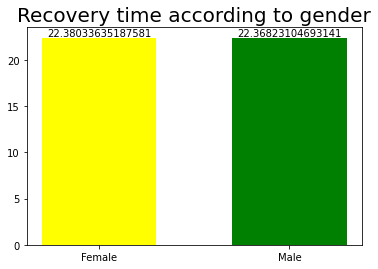

In [ ]:
x = ['Female', 'Male']
y = mean['recovered_date']
plt.bar(x, y, color = ['yellow', 'green'], align = 'center', width = 0.6)
plt.title("Recovery time according to gender", size = 20)
for i, v in enumerate(x):
    plt.text(v, y[i], y[i],                 # 좌표 (x축 = v, y축 = y[0]..y[1], 표시 = y[0]..y[1])
             fontsize = 10, 
             color='black',
             horizontalalignment='center',  # horizontalalignment (left, center, right)
             verticalalignment='bottom')    # verticalalignment (top, center, bottom)

plt.show()